In [14]:
# Missing Value Imputation For Numeric Variables

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()




pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

FILE   = "HMEQ_Loss.csv"


df = pd.read_csv( FILE, encoding="ISO-8859-1" )

dt = df.dtypes

TARGET_F = "TARGET_BAD_FLAG"
TARGET_A = "TARGET_LOSS_AMT"


#print( dt )

objList = []
numList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )
    if dt[i] in (["float64","int64"]) : numList.append( i )


print(" OBJECTS ")
print(" ------- ")
for i in objList :
    print( i )
print(" ------- ")


print(" NUMBER ")
print(" ------- ")
for i in numList :
    print( i )
print(" ------- ")







"""
FILL IN MISSING WITH THE CATEGORY "MISSING"
"""
#How many objects are in the list
for i in objList :
    if df[i].isna().sum() == 0 : continue
    NAME = "IMP_"+i
    df[NAME] = df[i]
    df[NAME] = df[NAME].fillna("MISSING")
    g = df.groupby( NAME )
    df = df.drop( i, axis=1 )


dt = df.dtypes
objList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )



'''
EXPLORE THE CATEGORICAL / OBJECT VARIABLES
'''

# df["y_JOB_7"] = (df.IMP_JOB.isin( ["a_Other"] ) + 0 )
# df["y_JOB_6"] = (df.IMP_JOB.isin( ["a_Other","b_MISSING"] ) + 0)
# df["y_JOB_5"] = (df.IMP_JOB.isin( ["a_Other","b_MISSING","c_Office"] ) + 0)
# df["y_JOB_4"] = (df.IMP_JOB.isin( ["a_Other","b_MISSING","c_Office","d_Sales"] ) + 0)
# df["y_JOB_3"] = (df.IMP_JOB.isin( ["a_Other","b_MISSING","c_Office","d_Sales","e_Mgr"] ) + 0)
# df["y_JOB_2"] = (df.IMP_JOB.isin( ["a_Other","b_MISSING","c_Office","d_Sales","e_Mgr","f_ProfExe"] ) + 0)
# df["y_JOB_1"] = (df.IMP_JOB.isin( ["a_Other","b_MISSING","c_Office","d_Sales","e_Mgr","f_ProfExe","g_Self"] ) + 0)
# df = df.drop( "IMP_JOB", axis=1 )
 

dt = df.dtypes
objList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )


for i in objList :
    thePrefix = "z_" + i
    y = pd.get_dummies( df[i], prefix=thePrefix, drop_first=True )   
    #y = pd.get_dummies( df[i], prefix=thePrefix )   
    df = pd.concat( [df, y], axis=1 )
    #df = df.drop( i, axis=1 )



g = df.groupby("IMP_JOB")
i = "VALUE"
print( g[i].median() )

i = "VALUE"
FLAG = "M_" + i
IMP = "IMP_" + i
#print( i )
#print( FLAG )
#print( IMP )
df[ FLAG ] = df[i].isna() + 0
df[ IMP ] = df[ i ]
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Mgr"]), IMP ] = 767
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Office"]), IMP ] = 948
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Other"]), IMP ] = 2388
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Doctor"]), IMP ] = 1276
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["ProfExe"]), IMP ] = 109
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Sales"]), IMP ] = 193
df.loc[ df[IMP].isna(), IMP ] = df[i].median()
df = df.drop( i, axis=1 )
numList.remove(i)


for i in numList :
    if df[i].isna().sum() == 0 : continue
    FLAG = "M_" + i
    IMP = "IMP_" + i
    #print(i)
    #print( df[i].isna().sum() )
    #print( FLAG )
    #print( IMP )
    #print(" ------- ")
    df[ FLAG ] = df[i].isna() + 0
    df[ IMP ] = df[ i ]
    df.loc[ df[IMP].isna(), IMP ] = df[i].median()
    df = df.drop( i, axis=1 )



for i in objList:
    df = df.drop( i, axis=1 )




SomeData = df.head().T
for r in range( SomeData.shape[0] ):
    print( SomeData.iloc[r,] )
    print("---\n\n")

 OBJECTS 
 ------- 
REASON
JOB
 ------- 
 NUMBER 
 ------- 
LOAN
MORTDUE
VALUE
YOJ
DEROG
DELINQ
CLAGE
NINQ
CLNO
DEBTINC
 ------- 
IMP_JOB
MISSING     78227.0
Mgr        101258.0
Office      89094.5
Other       76599.5
ProfExe    110007.0
Sales       84473.5
Self       130631.0
Name: VALUE, dtype: float64
0    1.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: TARGET_BAD_FLAG, dtype: float64
---


0     641.0
1    1109.0
2     767.0
3    1425.0
4       NaN
Name: TARGET_LOSS_AMT, dtype: float64
---


0    1100.0
1    1300.0
2    1500.0
3    1500.0
4    1700.0
Name: LOAN, dtype: float64
---


0    1.0
1    1.0
2    1.0
3    0.0
4    1.0
Name: z_IMP_REASON_HomeImp, dtype: float64
---


0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: z_IMP_REASON_MISSING, dtype: float64
---


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: z_IMP_JOB_Mgr, dtype: float64
---


0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: z_IMP_JOB_Office, dtype: float64
---


0    1.0
1    1.0
2    1.0
3    0.0
4    0.

       PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0 -0.718707 -3.174716 -0.348869  0.550991 -0.116012 -1.857075  0.142293   
1 -0.977932 -2.632905  0.781261 -0.016121 -0.311678 -1.678009 -0.867090   
2 -0.632853 -3.331564 -0.451209  0.603790 -0.167757 -1.748740  0.092839   
3  9.623736 -1.990956  2.036012 -2.056328  0.557030  2.323198 -3.370317   
4 -0.911996 -1.805117  0.802880  0.996938  0.587211 -2.282235 -1.059337   

       PC_8      PC_9     PC_10     PC_11     PC_12     PC_13     PC_14  \
0  0.404821  0.206736  0.663885 -0.021955 -0.182860  0.433864 -0.196841   
1 -0.425710  0.444908  0.527021 -0.614742  0.953045  0.179218  0.005183   
2 -0.273195  0.368528  0.620908  0.377734 -0.421365 -0.192818  0.355139   
3  1.720161  3.498588  0.813979  2.778332 -0.944301  1.476535 -1.227736   
4 -0.226452  0.478283  0.509710 -0.170332 -0.221586  0.511227 -0.271611   

      PC_15     PC_16     PC_17     PC_18     PC_19     PC_20  
0 -0.277948  0.022210  0.038461 -0

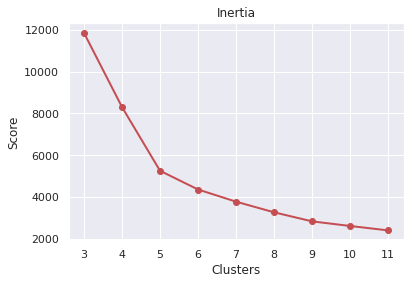

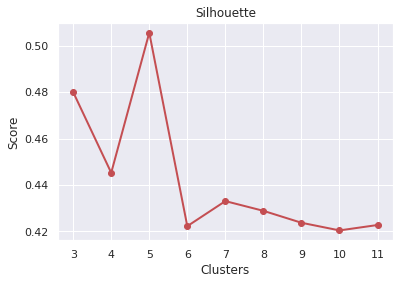

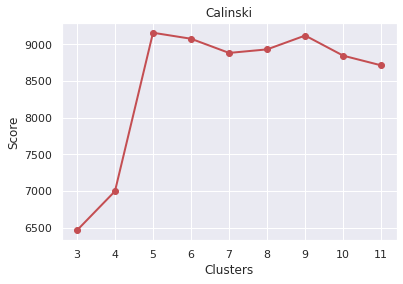





K =  3
   TARGET_BAD_FLAG  TARGET_LOSS_AMT  LOAN  z_IMP_REASON_HomeImp  \
0                1            641.0  1100                     1   
1                1           1109.0  1300                     1   
2                1            767.0  1500                     1   
3                1           1425.0  1500                     0   
4                0              NaN  1700                     1   

   z_IMP_REASON_MISSING  z_IMP_JOB_Mgr  z_IMP_JOB_Office  z_IMP_JOB_Other  \
0                     0              0                 0                1   
1                     0              0                 0                1   
2                     0              0                 0                1   
3                     1              0                 0                0   
4                     0              0                 1                0   

   z_IMP_JOB_ProfExe  z_IMP_JOB_Sales  z_IMP_JOB_Self  M_VALUE  IMP_VALUE  \
0                  0                0         

In [18]:

import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score


import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA



pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)



df

# FILE   = "HMEQ_Loss.csv"


# df = pd.read_csv( FILE, encoding="ISO-8859-1" )
TARGET1 = "TARGET_BAD_FLAG"
TARGET2 = "TARGET_LOSS_AMT"
CAT1 = "z_IMP_REASON_HomeImp"
CAT2 = "z_IMP_JOB_Mgr"
CAT3 = "z_IMP_JOB_Office"
CAT4 = "z_IMP_JOB_Other"
CAT5 = "z_IMP_JOB_ProfExe"
CAT6 = "z_IMP_JOB_Sales"
CAT7 = "z_IMP_JOB_Self"
CAT8 = "z_IMP_REASON_MISSING"



X = df.copy()
X = X.drop( [TARGET1,TARGET2,CAT1,CAT2,CAT3,CAT4,CAT5,CAT6,CAT7,CAT8], axis=1 )
varNames = X.columns







#print( X.head() )
#print( X.describe() )
#print( "\n\n")


##
##### TRANSFROM
##
theScaler = StandardScaler()
theScaler.fit( X )

X_TRN = theScaler.transform( X )
X_TRN = pd.DataFrame( X_TRN )
#print( X_TRN.head() )
#print( "\n\n")


pca = PCA()
pca.fit( X_TRN )
X_TRN = pca.transform( X_TRN )
X_TRN = pd.DataFrame( X_TRN )

varNames_trn = []
for i in range(X_TRN.shape[1]) :
    index = str(i+1)
    newName = "PC_" + index
    varNames_trn.append( newName )

X_TRN.columns = varNames_trn
print( X_TRN.head() )
print( "\n\n")

X_TRN = X_TRN.iloc[:,0:2]
print( X_TRN.head() )
print( "\n\n")



K_LIST = []
I_LIST = []
S_LIST = []
C_LIST = []

for K in range(3,12) :
    km = KMeans( n_clusters=K, random_state = 1 )
    km.fit( X_TRN )
    #Y = km.predict( X_TRN )
    K_LIST.append( K )
    I_LIST.append( km.inertia_ )
    S_LIST.append( silhouette_score(X_TRN,km.labels_) )
    C_LIST.append( calinski_harabasz_score(X_TRN,km.labels_) )


def drawElbow( K, SCORE, LABEL ) :
    plt.plot( K , SCORE, 'ro-', linewidth=2)
    plt.title(LABEL)
    plt.xlabel('Clusters')
    plt.ylabel('Score')
    plt.show()


drawElbow( K_LIST, I_LIST, "Inertia" )
drawElbow( K_LIST, S_LIST, "Silhouette" )
drawElbow( K_LIST, C_LIST, "Calinski" )





def clusterData( DATA, TRN_DATA, K, TARGET ) :
    print("\n\n\n")
    print("K = ",K)
    print("=======")
    km = KMeans( n_clusters=K, random_state = 1 )
    km.fit( TRN_DATA )
    Y = km.predict( TRN_DATA )
    DATA["CLUSTER"] = Y
    print( DATA.head() )

    G = DATA.groupby("CLUSTER")
    print( G.mean() )
    print("\n\n\n")
    print( G[ TARGET ].value_counts() )



clusterData( df, X_TRN, 3, TARGET1 )
#clusterData( df, X_TRN, 4, TARGET )
#clusterData( df, X_TRN, 5, TARGET )












